Test using numbalsoda

In [8]:
from numbalsoda import lsoda_sig, lsoda, dop853
from numba import njit, cfunc
import numpy as np
import matplotlib.pyplot as plt

@cfunc(lsoda_sig)
def rhs(t, u, du, p):
    du[0] = u[0]-u[0]*u[1]
    du[1] = u[0]*u[1]-u[1]*p[0]

funcptr = rhs.address # address to ODE function
u0 = np.array([5.,0.8]) # Initial conditions
data = np.array([1.0]) # data you want to pass to rhs (data == p in the rhs).
t_eval = np.linspace(0.0,50.0,1000) # times to evaluate solution

# integrate with lsoda method
usol, success = lsoda(funcptr, u0, t_eval, data = data)

# integrate with dop853 method
#usol1, success1 = dop853(funcptr, u0, t_eval, data = data)

@njit
def test():
    usol, success = dop853(funcptr, u0, t_eval, data = data)
    return usol

usol = test() # this works!

Test adding two waves.

c:\Users\User\miniconda3\envs\TEMGYMAdvanced\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


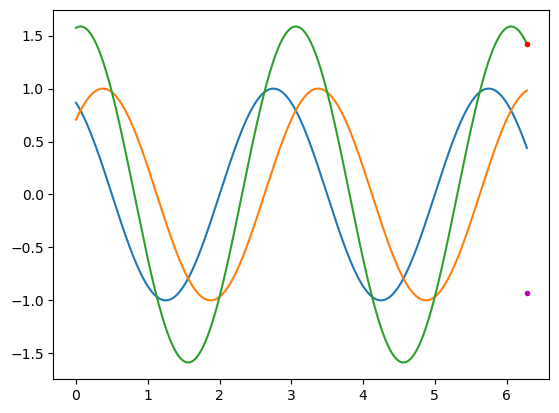

In [9]:
x = np.linspace(0, 2*np.pi, 1000)

y1 = 1*np.sin(2*np.pi/3 * x + np.pi/1.5)
y2 = 1*np.sin(2*np.pi/3 * x + np.pi/4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y1+y2)

phase_difference = np.pi/1.5+np.pi/1.4
y1_exp = np.exp(1j*(2*np.pi/3 * 2*np.pi + np.pi/1.5))/1j + np.exp(1j*(2*np.pi/3 * 2*np.pi + np.pi/4))/1j
plt.plot(2*np.pi, y1_exp, '.r')
plt.plot(2*np.pi, np.exp(1j*(phase_difference))/1j, '.m')

#new_wave = np.exp(1j*(((2/2)*np.pi)*(x) + np.pi/1.5))+np.exp(1j*(((2/3)*np.pi)*(x) + np.pi/4))
#A = abs(new_wave)
#phase = np.angle(new_wave)

#plt.plot(x, new_wave, '--', color = 'g', lw = 4, alpha = 0.5)


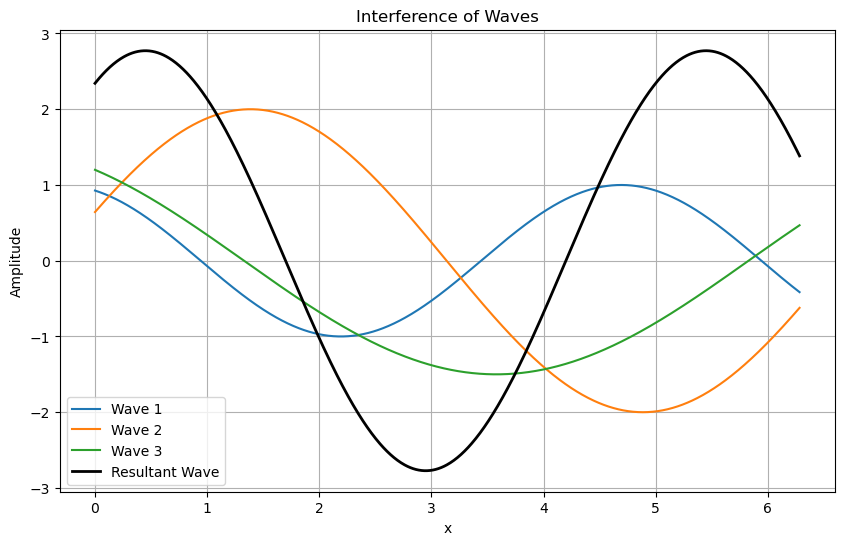

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_interference(optical_path_lengths, wave_numbers, amplitudes):
    # Calculate phase differences for each wave
    phase_differences = [(2 * np.pi * optical_path_length * wave_number) for optical_path_length, wave_number in zip(optical_path_lengths, wave_numbers)]

    # Calculate complex representation of each wave
    waves = [amplitude * np.exp(1j * phase) for amplitude, phase in zip(amplitudes, phase_differences)]

    # Sum all the waves together
    sum_wave = np.sum(waves)

    # Calculate amplitude and phase of the resultant wave
    resultant_amplitude = np.abs(sum_wave)
    resultant_phase = np.angle(sum_wave)

    return resultant_amplitude, resultant_phase, waves

# Example usage:
wavelength = 500e-9  # Wavelength in meters (e.g., for light in the visible spectrum)
optical_path_lengths = [0.5, 1.0, 1.5]  # Optical path lengths for each wave in meters
wave_numbers = [2 * np.pi / 5, 2 * np.pi / 7, 2 * np.pi / 9]  # Wave numbers for each wave
amplitudes = [1.0, 2.0, 1.5]  # Amplitudes of each wave

resultant_amplitude, resultant_phase, waves = calculate_interference(optical_path_lengths, wave_numbers, amplitudes)

# Generate x values (e.g., from 0 to 2*pi) where you want to evaluate the waves
x_values = np.linspace(0, 2 * np.pi, 1000)

# Plot each individual wave
plt.figure(figsize=(10, 6))
plt.title('Interference of Waves')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)

for i, wave in enumerate(waves):
    amplitude = amplitudes[i]
    phase_difference = (2 * np.pi * optical_path_lengths[i] * wave_numbers[i]) / wavelength
    individual_wave = amplitude * np.cos(wave_numbers[i] * x_values + phase_difference)
    plt.plot(x_values, individual_wave, label=f'Wave {i + 1}')

# Plot the resulting sum (resultant wave)
resultant_wave = resultant_amplitude * np.cos(wave_numbers[0] * x_values + resultant_phase)
plt.plot(x_values, resultant_wave, label='Resultant Wave', linewidth=2, color='black')

plt.legend()
plt.show()
